# 📘 Módulo 4: Análisis de Series de Tiempo
# ============================================================

# ✳️ Introducción 

"""
Una serie de tiempo es una secuencia de observaciones registradas en intervalos regulares de tiempo.
En logística, las series de tiempo se usan para:
- Analizar la demanda mensual o semanal de productos.
- Detectar tendencias en tiempos de entrega.
- Evaluar estacionalidad (por ejemplo, más pedidos en diciembre).
- Pronosticar la demanda futura para planificar inventarios y transporte.

Tipos de componentes en una serie de tiempo:
1. **Tendencia (Trend)**: dirección general a largo plazo.
2. **Estacionalidad (Seasonality)**: fluctuaciones periódicas regulares.
3. **Ciclos (Cycles)**: movimientos recurrentes pero no necesariamente regulares.
4. **Ruido (Noise)**: variaciones aleatorias o impredecibles.

A continuación, desarrollaremos un ejemplo práctico.
"""

In [6]:
# ============================================================
# 🔹 Ejemplo: Pronóstico de demanda mensual en una empresa logística
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generar datos ficticios de demanda mensual (3 años)
np.random.seed(42)
meses = pd.date_range(start="2022-01-01", periods=36, freq="ME")
demanda = 200 + 10 * np.arange(36) + 30 * np.sin(np.arange(36) * 2 * np.pi / 12) + np.random.normal(0, 15, 36)

# Crear DataFrame
df = pd.DataFrame({"Fecha": meses, "Demanda": np.round(demanda, 0)})
df.set_index("Fecha", inplace=True)

# Mostrar las primeras filas
df.head()

,Demanda
Fecha,
2022-01-31,207.0
2022-02-28,223.0
2022-03-31,256.0
2022-04-30,283.0
2022-05-31,262.0


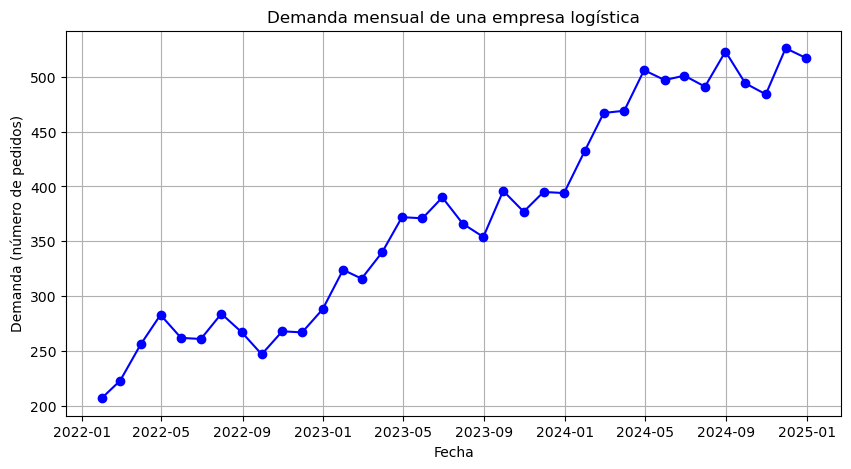

In [8]:
# Gráfico de la serie de tiempo
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Demanda"], marker="o", linestyle="-", color="blue")
plt.title("Demanda mensual de una empresa logística")
plt.xlabel("Fecha")
plt.ylabel("Demanda (número de pedidos)")
plt.grid(True)
plt.show()

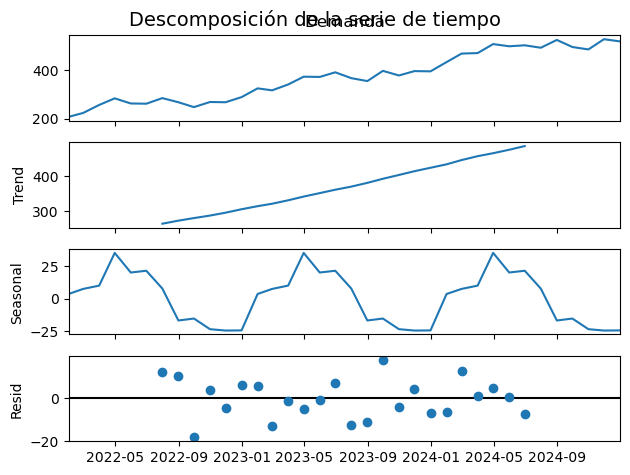

In [10]:
# Descomponer la serie
descomposicion = seasonal_decompose(df["Demanda"], model="additive", period=12)
descomposicion.plot()
plt.suptitle("Descomposición de la serie de tiempo", fontsize=14)
plt.show()

C:\Users\JAMAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


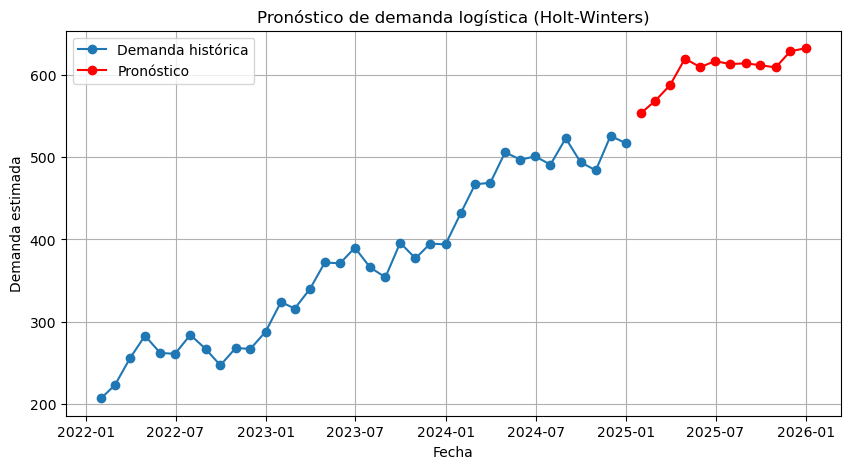

In [15]:
# Ajustar el modelo Holt-Winters (tendencia y estacionalidad)
modelo = ExponentialSmoothing(df["Demanda"], trend="add", seasonal="add", seasonal_periods=12).fit()

# Pronóstico de los próximos 12 meses
pronostico = modelo.forecast(12)

# Visualización del pronóstico
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Demanda"], label="Demanda histórica", marker="o")
plt.plot(pronostico.index, pronostico, label="Pronóstico", marker="o", color="red")
plt.title("Pronóstico de demanda logística (Holt-Winters)")
plt.xlabel("Fecha")
plt.ylabel("Demanda estimada")
plt.legend()
plt.grid(True)
plt.show()

"""
Interpretación:
- La línea azul muestra la evolución de la demanda histórica.
- La línea roja representa el pronóstico de los próximos 12 meses.
- Se observa una clara tendencia creciente y un comportamiento estacional anual.

Aplicaciones en logística:
✅ Planificación de inventarios.
✅ Optimización de rutas según picos de demanda.
✅ Asignación de personal y transporte de acuerdo a patrones temporales.
"""